**Inferences for Two Population Means, Using Independent Samples Standard Deviations Not Assumed Equal**

In cases we want to test for two population means and the standard deviations are different between the two populations, the so called **non-pooled $t$-test** or **Welch's $t$-test** is applied.

The **non-pooled $t$-test** is very similar to the **pooled $t$-test**, except for the test statistic $t$ and for the calculation of the degrees of freedom $(df)$. The test statistic does not invoke $s_p$, the pooled standard deviation, and is written as

$$t =  \frac{(\bar x_1 - \bar x_2)}{ \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}\text{.}$$

The denominator of the equation from above is the estimator of the standard deviation of $\bar{x}_1 - \bar{x}_2$, given by

$$s_{\bar x_1 - \bar x_2} = \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}\text{.}$$

The test statistics $t$ has a $t$-distribution and the degrees of freedom $(df)$ are given by

$$df=\frac{\left(\frac{s_1^2}{n_1}+\frac{s_1^2}{n_2}\right)^2}{\frac{\left(\frac{s_1^2}{n_1}\right)^2}{n_1-1}+\frac{\left(\frac{s_2^2}{n_2}\right)^2}{n_2-1}}\text{.}$$

Round down the degrees of freedom to the nearest integer.

The **non-pooled $t$-test** is robust to moderate violations of normal population assumption, but it is less robust regarding outliers.

**Interval Estimation of $\mu_1 - \mu_2$**

The $100(1-\alpha)$% confidence interval for $\mu_1 - \mu_2$ is 

$$(\bar x_1 - \bar x_2) \pm t^* \times  \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}$$

where the value of $t$ is obtained from the $t$-distribution for the given confidence level. The degrees of freedom $(df)$ is obtained from the equation above.

**The Non-Pooled $t$-test: An example**

We work with the *students* data set.

n order to showcase the non-pooled t-test we examine the mean annual salary (in Euro) of female graduates with respect to their major study subject. The first population consists of female students with their major in Political Science and the second population of female students with their major in Social Sciences. We want to test, whether there is a difference in the mean salary of these two groups?

**Data Preparation**

We start with data prepartion.

- We subset the data set based on the variables <mark> gender </mark> and <mark> graduated </mark>.

- Then we split the subset into graduates of Political Science and Social Sciences (variable <mark> major </mark>), respectively.

- Then we sample from each group $50$ students and extract the variable of interest, the mean annual salary (in Euro), which is stored in the column <mark> salary </mark>. We assign those two vectors to the varibles <mark> PS </mark> and <mark> SS </mark>.

In [7]:
import pandas as pd
import numpy as np

students_df = pd.read_csv("https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv")

female_grad = students_df[(students_df['gender'] == 'Female') & (students_df['graduated'] == 1)]

subset_PS = female_grad[female_grad['major']=='Political Science']
subset_SS = female_grad[female_grad['major'] == 'Social Sciences']

n = 50

PS = np.random.choice(subset_PS['salary'], n)
SS = np.random.choice(subset_SS['salary'],n)

Further we check if the data is normally distributed by plotting a **Q-Q plot**.

Text(0.5, 1.0, 'Q-Q plot for female graduates of Social Sciences (sample data)')

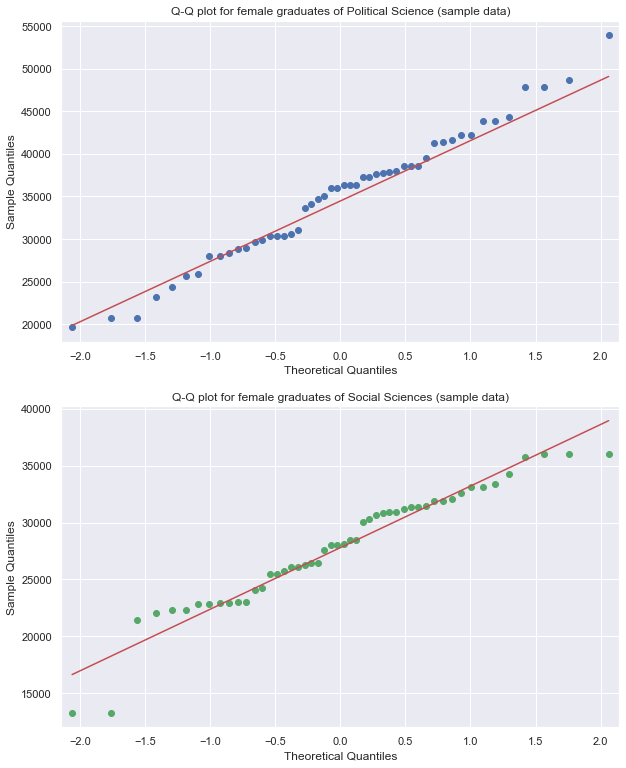

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10,13)})

fig, axs = plt.subplots(nrows=2)
sm.qqplot(PS, ax=axs[0], line='q')
axs[0].set_title('Q-Q plot for female graduates of Political Science (sample data)')
sm.qqplot(SS,ax=axs[1], line='q', color='g')
axs[1].set_title('Q-Q plot for female graduates of Social Sciences (sample data)')



We see that the data of both samples falls roughly on a straight line.

Let us assume that the data of the *students* data set is a good approximation for the population. Then, we may check visually if the standard deviations of the two populations actually differ from each other by using a box plot

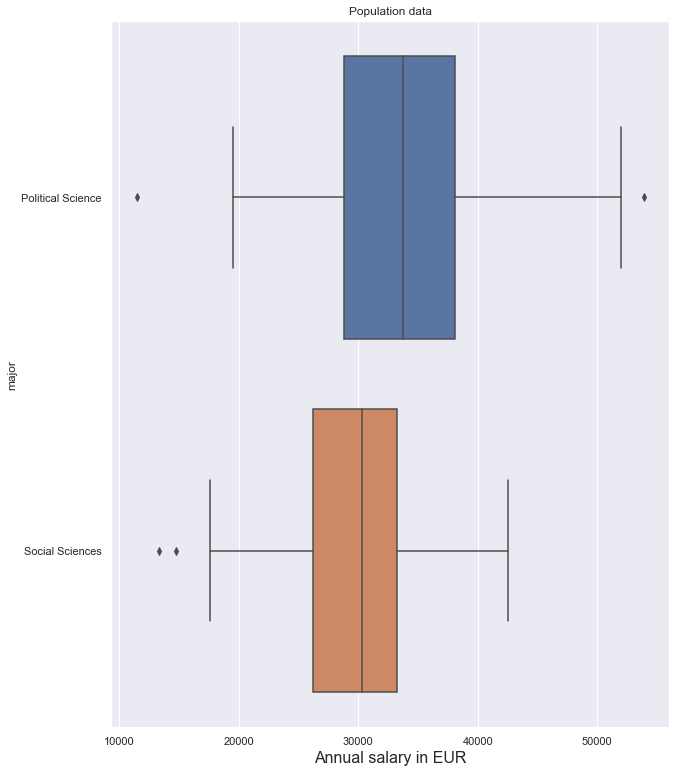

In [29]:

plt.title('Population data')
sns.boxplot(x='salary', y='major', data= female_grad[(female_grad['major']=='Political Science') | (female_grad['major']=='Social Sciences')])
plt.xlabel('Annual salary in EUR', fontsize=16)

pass

Based on the graphical evaluation approach we conclude that the data is roughly normally distributed and that the standard deviations differ from each other.

**Hypothesis testing**

Recall the research question. **Do the data provide sufficient evidence to conclude that the mean annual salary of female graduates with a major in Political Science differs from the mean annual salary of female graduates with a major in Social Sciences?**

In order to conduct the non-pooled $t$-test we follow the step-wise implementation procedure for hypothesis testing.

**Step 1: State the null hypothesis $H_0$ and alternative hypothesis $H_A$**

The null hypothesis states that the average annual salary of female graduates with a major in Political Science $(\mu_1)$ is equal to the average annual salary of female graduates with a major in Social Sciences $(\mu_2)$.

$$H_0 : \mu_1 = \mu_2$$

**Alternative hypothesis**

$$H_A : \mu_1 \neq \mu_2$$

This formulation results in a two-sided hypothesis test.

**Step 2: Decide on the significance level, $\alpha$**

$$\alpha = 0.05$$


In [30]:
alpha = 0.05

**Step 3 and 4: Compute the value of the test statistic and the p-value.**

For illustration purposes we manually compute the test statistic in Python. Recall the equations for the test statistic from above.

$$t =  \frac{(\bar x_1 - \bar x_2)}{ \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [31]:
import math

n1 = len(PS)
n2 = len(PS)
s1 = np.std(PS, ddof=1)
s2 = np.std(SS,ddof=1)
x1_bar = np.mean(PS)
x2_bar = np.mean(SS)

t_statistic = (x1_bar-x2_bar)/(math.sqrt((s1**2)/n1+ (s2**2)/n2))

t_statistic

5.488249895961777

The numerical value of the test statistic is $5.488$

In order to calculate the $p$-value we apply <mark> cdf </mark> function. Recall how to caculate the degrees of freedom.

$$df=\frac{\left(\frac{s_1^2}{n_1}+\frac{s_1^2}{n_2}\right)^2}{\frac{\left(\frac{s_1^2}{n_1}\right)^2}{n_1-1}+\frac{\left(\frac{s_2^2}{n_2}\right)^2}{n_2-1}}\text{,}$$

In [32]:
# compute df

df_num = ((s1**2)/n1 + (s2**2)/n2)**2
df_denom = (((s1**2)/n1)**2)/(n1-1) + (((s2**2)/n2)**2)/(n2-1)
df = df_num/df_denom
df

85.97935866201493

In [34]:
# compute the p-value

from scipy.stats import t

upper = 1- t.cdf(t_statistic, df)
lower = t.cdf(-t_statistic, df)
p = upper + lower
p

4.0347457352091427e-07

In [35]:
from scipy.stats import ttest_ind

ttest_ind(PS,SS,equal_var=False)

Ttest_indResult(statistic=5.488249895961777, pvalue=4.034745735125342e-07)

**Step 5: If $p \leq \alpha$, reject $H_0$; otherwise, do not reject $H_0$.**

The $p$-value is less than the specified significance level of $0.05$; we reject $H_0$. The test resutls are statistically significant at the $5$% level and provide very strong evidence against the null hypothesis.

**Step 6: Interpret the result of the hypothesis test.**

$p= 4.034745735125342 \times 10^{-7}$. At the $5$% significance level, the data provides very strong evidence to conclude that the average annual salary of female graduates of Political Science differs from the average annual salary of female graduates of Social Sciences.